In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pdf = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/weather-stations20140101-20141231.csv')
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [4]:
pdf.tail()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1337,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992
1340,WABUSH A,52.923,-66.865,NL,-27.7,0.0,NaN,-13.6,0.0,-46.8,...,0.0,NaN,NaN,2.0,NaN,NaN,NaN,1279.9,0.0,8504177


In [5]:
pdf.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,1341.000000,1341.000000,1256.000000,1256.000000,357.000000,1260.000000,1260.000000,1260.000000,1260.000000,586.000000,...,1227.000000,1227.000000,209.000000,798.000000,1227.000000,0.0,0.0,0.0,1256.000000,1256.0
mean,51.185221,-96.670827,-12.062341,2.186306,-2.768908,2.612302,1.814286,-26.322381,1.816667,35.219966,...,50.402363,2.612062,118.368421,31.325815,7.480033,NaN,NaN,NaN,773.277150,0.0
std,6.216434,23.285512,10.416366,4.903077,4.840769,8.855823,4.249613,12.573066,4.438321,39.575586,...,62.312551,4.889425,64.527522,33.799751,4.740601,NaN,NaN,NaN,311.119277,0.0
min,41.949000,-140.868000,-38.200000,0.000000,-12.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,26.000000,0.0
25%,46.983000,-116.501000,-18.500000,0.000000,-7.100000,-3.500000,0.000000,-35.425000,0.000000,9.000000,...,13.200000,0.000000,75.000000,2.000000,4.000000,NaN,NaN,NaN,560.100000,0.0
50%,49.850000,-101.400000,-13.800000,0.000000,-4.600000,2.500000,0.000000,-29.100000,0.000000,25.000000,...,27.100000,0.000000,104.000000,26.000000,7.000000,NaN,NaN,NaN,813.500000,0.0
75%,53.283000,-73.750000,-5.600000,2.000000,2.700000,10.000000,1.000000,-21.700000,1.000000,49.875000,...,60.500000,3.000000,147.000000,45.000000,11.000000,NaN,NaN,NaN,988.000000,0.0
max,82.500000,-52.753000,9.600000,27.000000,7.800000,22.000000,27.000000,5.300000,27.000000,245.000000,...,516.800000,27.000000,400.000000,253.000000,28.000000,NaN,NaN,NaN,1523.400000,0.0


In [6]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [7]:
pdf.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [8]:
import seaborn as sns

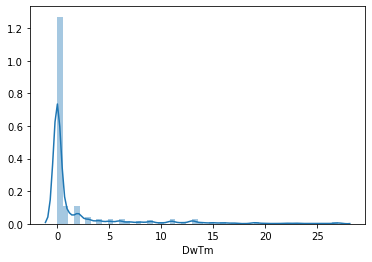

In [9]:
sns.distplot(pdf.DwTm)

In [10]:
pdf = pdf[pd.notnull(pdf['Tm'])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

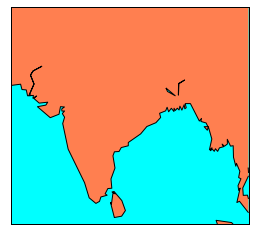

In [12]:


map = Basemap(projection='cyl',
           llcrnrlon=65.,
           llcrnrlat=5.,
           urcrnrlon=100.,
           urcrnrlat=37.)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawmapboundary()
map.drawcoastlines()


In [13]:
rcParams['figure.figsize'] = (16,10)
llon = -140
ulon = -50
llat = 40
ulat = 65
pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


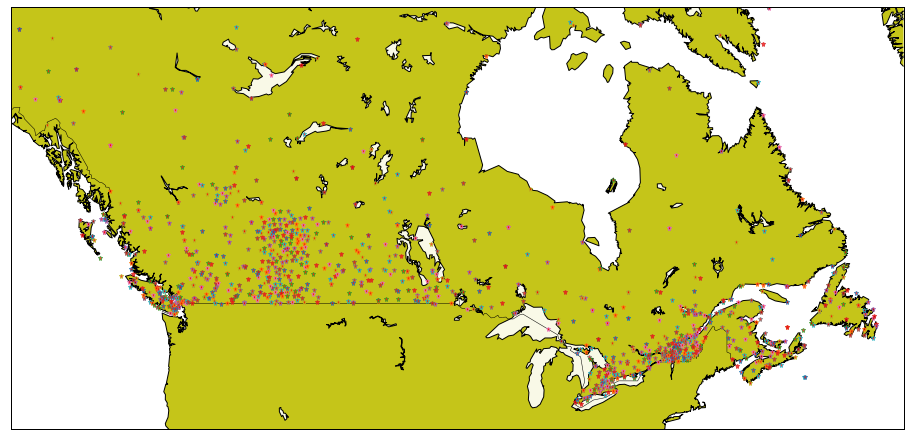

In [14]:
my_map = Basemap(projection='merc',
           resolution= 'l',
           area_thresh=1000.0,
           llcrnrlon=llon, llcrnrlat = llat,
           urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'y', alpha = 0.9)
my_map.shadedrelief()


xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']=xs.tolist()
pdf['ym']=ys.tolist()
for index,row in pdf.iterrows():
    x,y = my_map(row.Long, row.Lat)
    my_map.plot(row.xm,
               row.ym,
               markerfacecolor = ([1,0,0]),
               marker='*',
               markersize=5,
               alpha = 0.75)
    
plt.show()

In [15]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

RandomState(MT19937) at 0x2122B82F258

In [16]:
clus_dataset = pdf[['xm','ym']]
clus_dataset

,xm,ym
0,1.807806e+06,1.396332e+06
1,1.764329e+06,1.377564e+06
2,1.773336e+06,1.378409e+06
3,1.809363e+06,1.362546e+06
4,1.841498e+06,1.311615e+06
...,...,...
1251,8.708449e+06,2.799614e+06
1252,8.708560e+06,2.799815e+06
1253,8.608040e+06,3.168105e+06
1254,9.078172e+06,2.438267e+06


In [17]:
clus_dataset = np.nan_to_num(clus_dataset)
clus_dataset = StandardScaler().fit_transform(clus_dataset)
clus_dataset

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [18]:
db = DBSCAN(eps=0.95, min_samples=50).fit(clus_dataset)

In [19]:
db

DBSCAN(eps=0.95, min_samples=50)

In [20]:
db.core_sample_indices_

array([   0,    1,    2, ..., 1180, 1182, 1188], dtype=int64)

In [21]:
db.components_

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.55920048,  0.63014678],
       [ 1.75599681,  0.3992518 ],
       [ 1.2814717 ,  0.53978899]])

In [22]:
core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
pdf["Clus_DB"] = labels

[ 0  0  0 ... -1  0  0]


In [23]:
set(pdf.Clus_DB)

{-1, 0}

In [24]:
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_DB
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06,0
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06,0
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06,0


In [25]:
pdf.Clus_DB

0       0
1       0
2       0
3       0
4       0
       ..
1251    0
1252    0
1253   -1
1254    0
1255    0
Name: Clus_DB, Length: 1189, dtype: int64

In [26]:
realClusterNumber = len(set(labels)) - (1 if -1 in labels else 0)
ClusterNum = len(set(labels))
pdf[["Stn_Name", "Tx", "Tm", "Clus_DB"]]

,Stn_Name,Tx,Tm,Clus_DB
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
...,...,...,...,...
1251,NAIN A,-6.8,-22.6,0
1252,NAIN A,-7.5,-19.2,0
1253,SAGLEK,-13.5,-24.4,-1
1254,TUKIALIK BAY,-5.8,-22.8,0


In [27]:
set(labels)

{-1, 0}

cluster 0, Avg Temp: -10.804366438356162


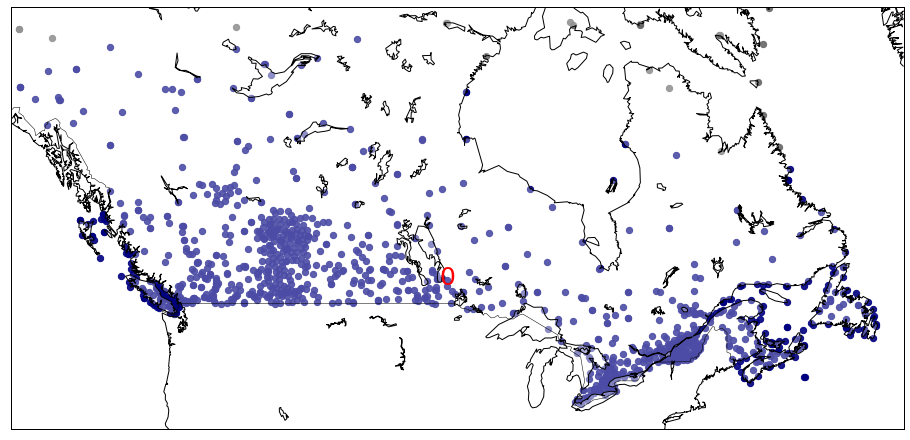

In [28]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (16,10)
my_map = Basemap(projection='merc',
           resolution= 'l',
           area_thresh=1000.0,
           llcrnrlon=llon,
           llcrnrlat = llat,
           urcrnrlon=ulon,
           urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, ClusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4])) if clust_number == -1 else colors[np.int(clust_number)]
    clust_set = pdf[pdf.Clus_DB == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color=c, marker = 'o', s = 40, alpha=0.9)
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx,ceny,str(clust_number), fontsize = 25, color='red')
        print('cluster '+str(clust_number)+', Avg Temp: '+str(np.mean(clust_set.Tm)))

In [29]:
db = DBSCAN(eps=0.95, min_samples=10).fit(clus_dataset)

In [30]:
db

DBSCAN(eps=0.95, min_samples=10)

In [31]:
db.core_sample_indices_

array([   0,    1,    2, ..., 1186, 1187, 1188], dtype=int64)

In [32]:
db.components_

array([[-1.16833902, -0.33176141],
       [-1.18518021, -0.35499148],
       [-1.18169137, -0.35394619],
       ...,
       [ 1.46577713,  1.86125634],
       [ 1.64788589,  0.95789607],
       [ 1.2814717 ,  0.53978899]])

In [33]:
core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)
pdf["Clus_DB"] = labels

[0 0 0 ... 0 0 0]


In [34]:
set(pdf.Clus_DB)

{0}

In [35]:
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_DB
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.807806e+06,1.396332e+06,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.764329e+06,1.377564e+06,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.773336e+06,1.378409e+06,0
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.809363e+06,1.362546e+06,0
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.841498e+06,1.311615e+06,0


In [36]:
pdf.Clus_DB

0       0
1       0
2       0
3       0
4       0
       ..
1251    0
1252    0
1253    0
1254    0
1255    0
Name: Clus_DB, Length: 1189, dtype: int64

In [37]:
realClusterNumber = len(set(labels)) - (1 if -1 in labels else 0)
ClusterNum = len(set(labels))
pdf[["Stn_Name", "Tx", "Tm", "Clus_DB"]]

,Stn_Name,Tx,Tm,Clus_DB
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
...,...,...,...,...
1251,NAIN A,-6.8,-22.6,0
1252,NAIN A,-7.5,-19.2,0
1253,SAGLEK,-13.5,-24.4,0
1254,TUKIALIK BAY,-5.8,-22.8,0


In [38]:
set(labels)

{0}

cluster 0, Avg Temp: -11.11968040370059


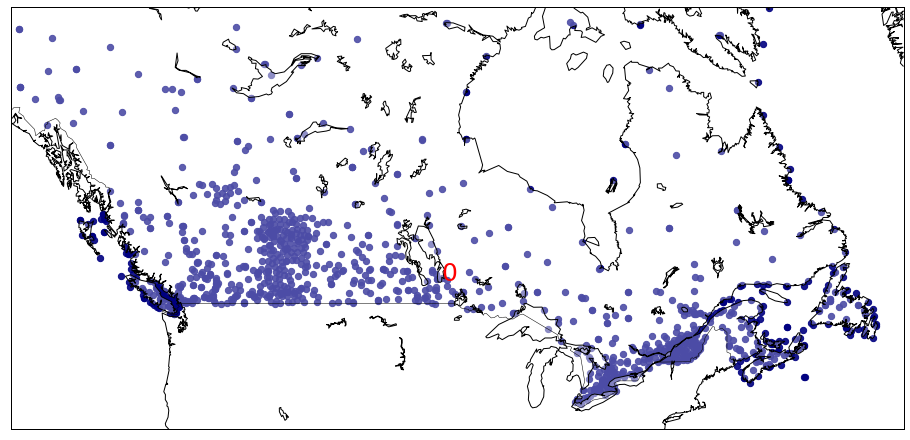

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (16,10)
my_map = Basemap(projection='merc',
           resolution= 'l',
           area_thresh=1000.0,
           llcrnrlon=llon,
           llcrnrlat = llat,
           urcrnrlon=ulon,
           urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, ClusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4])) if clust_number == -1 else colors[np.int(clust_number)]
    clust_set = pdf[pdf.Clus_DB == clust_number]
    my_map.scatter(clust_set.xm, clust_set.ym, color=c, marker = 'o', s = 40, alpha=0.9)
    if clust_number != -1:
        cenx = np.mean(clust_set.xm)
        ceny = np.mean(clust_set.ym)
        plt.text(cenx,ceny,str(clust_number), fontsize = 25, color='red')
        print('cluster '+str(clust_number)+', Avg Temp: '+str(np.mean(clust_set.Tm)))